# Proyek Analisis Data: Nama dataset
- Nama: Yehezkiel Orchestra
- Email:yehezkielorchestra@gmail.com
- Id Dicoding:kielorchestra

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan antara pengguna fasilitas Bike Sharing yang sudah terdaftar dan belum
- Bagaimana tren penggunaan fasilitas Bike Sharing dari tahun ke tahun berdasarkan bulan 

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import os

## Data Wrangling

### Gathering Data

In [21]:
with open('Data/Bike-sharing-dataset/day.csv', 'r') as f:
    data = f.read()
with open('Data/Bike-sharing-dataset/hour.csv', 'r') as f:
    data = f.read()

hour_df = pd.read_csv('Data/Bike-sharing-dataset/hour.csv')
day_df = pd.read_csv('Data/Bike-sharing-dataset/day.csv')

### Assessing Data

In [22]:
hour_df.isnull().sum()
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [23]:
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [24]:
day_df.describe()
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [25]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())


Jumlah duplikasi:  0


In [26]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [27]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])
  day_df[column] = pd.to_datetime(day_df[column])

### Cleaning Data

_

## Exploratory Data Analysis (EDA)

### Explore ...

In [28]:
Y2011_df = day_df.query('yr == 0')
Y2011MnthPivot_df = Y2011_df.groupby(by=["mnth"]).agg({
    "cnt": "sum",
    "mnth": "mean"
})

In [29]:
Y2012_df = day_df.query('yr == 1')
Y2012MnthPivot_df = Y2012_df.groupby(by=["mnth"]).agg({
    "cnt": "sum",
    "mnth": "mean"
})

In [30]:
Y2011SeasonPivot_df = Y2011_df.groupby(by=["season"]).agg({
    "cnt": "sum",
    "season" : "mean"
})

In [31]:
Y2012SeasonPivot_df = Y2012_df.groupby(by=["season"]).agg({
    "cnt": "sum",
    "season" : "mean"
})

In [32]:
Unregistered_user_df = day_df.groupby(by=['dteday']).agg({
    "casual": "sum"
})

In [33]:
Registered_user_df = day_df.groupby(by=['dteday']).agg({
    "registered": "sum"
})

In [34]:
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on=["dteday","season","yr","mnth","holiday","weekday","workingday"],
    right_on=["dteday","season","yr","mnth","holiday","weekday","workingday"]
)
del all_df['temp_x']
del all_df['atemp_x']
del all_df['hum_x']
del all_df['windspeed_x']
del all_df['casual_x']
del all_df['registered_x']
del all_df['weathersit_x']
del all_df['cnt_x']
del all_df['instant_x']

all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

Text(0.5, 1.0, 'Total Registered vs Unregistered Users (%)')

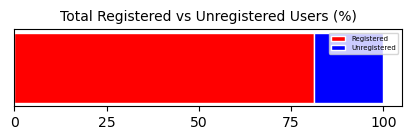

In [35]:
#Defining data source used to show comparison of registered and unregistered user
fig, ax = plt.subplots(figsize=(5,1))
registered = Registered_user_df
unregistered = Unregistered_user_df
raw_data = {'registered': [Registered_user_df.registered.sum()],'unregistered': [Unregistered_user_df.casual.sum()]}
df1 = pd.DataFrame(raw_data)

#Turning datas into percentage
totals = [i+j for i,j in zip(df1['registered'],df1['unregistered'])]
regist_plot = [i/j*100 for i,j in zip(df1['registered'],totals)] 
unregist_plot = [i/j*100 for i,j in zip(df1['unregistered'],totals)] 

#Bar Chart Customization
BarHeight = 1
labels =  np.arange(1)


ax.barh(labels,regist_plot, color='red',edgecolor='white',height=BarHeight)
ax.barh(labels,unregist_plot,left=regist_plot,color='blue',edgecolor='white',height=BarHeight)
ax.set_xticks([0,25,50,75,100])
ax.set_yticks([])
ax.legend(['Registered', 'Unregistered'],fontsize=5)
ax.set_title("Total Registered vs Unregistered Users (%)", loc="center", fontsize=10)

### Pertanyaan 2: 

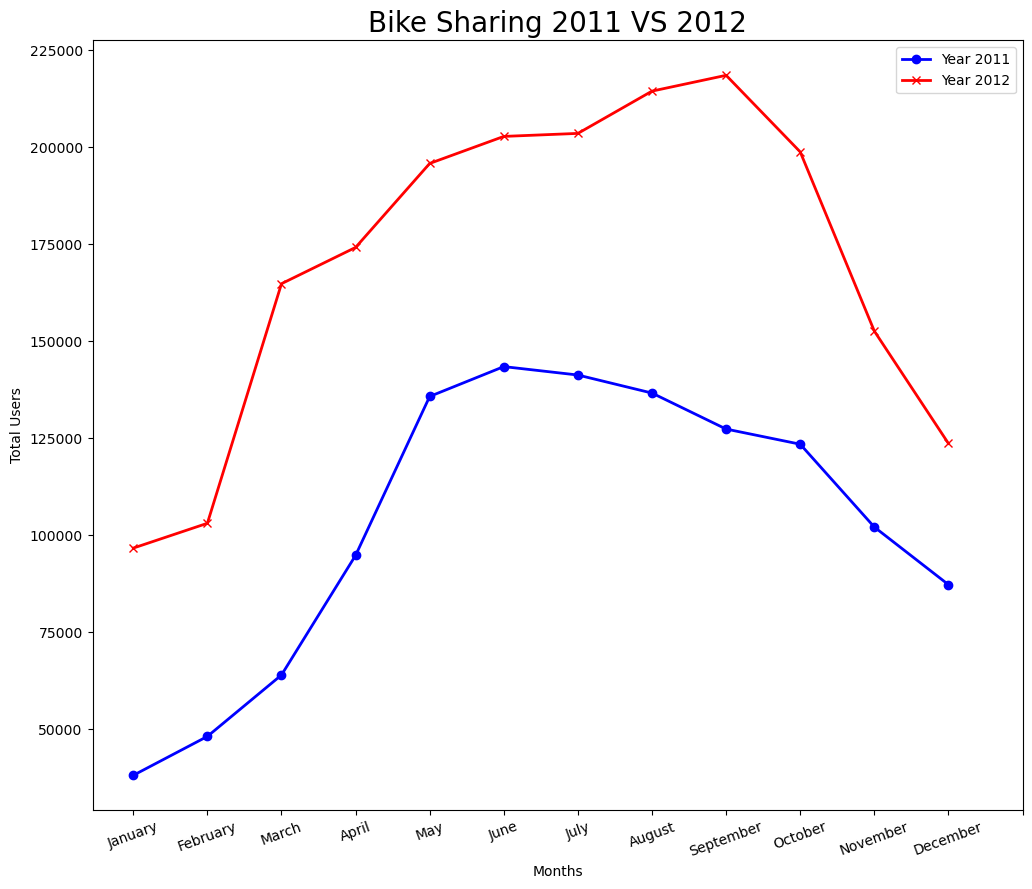

In [36]:
plt.figure(figsize=(12, 10))
plt.plot(
    Y2011MnthPivot_df["mnth"],
    Y2011MnthPivot_df["cnt"],
    marker='o', 
    linewidth=2,
    color="Blue"
)

plt.plot(
    Y2012MnthPivot_df["mnth"],
    Y2012MnthPivot_df["cnt"],
    marker='x',
    linewidth=2,
    color="red"
)
plt.xlabel("Months")
plt.ylabel("Total Users")
plt.xticks(np.arange(1, 13, step=1))
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', ''],
       rotation=20)
plt.legend(['Year 2011', 'Year 2012'])
plt.title("Bike Sharing 2011 VS 2012", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


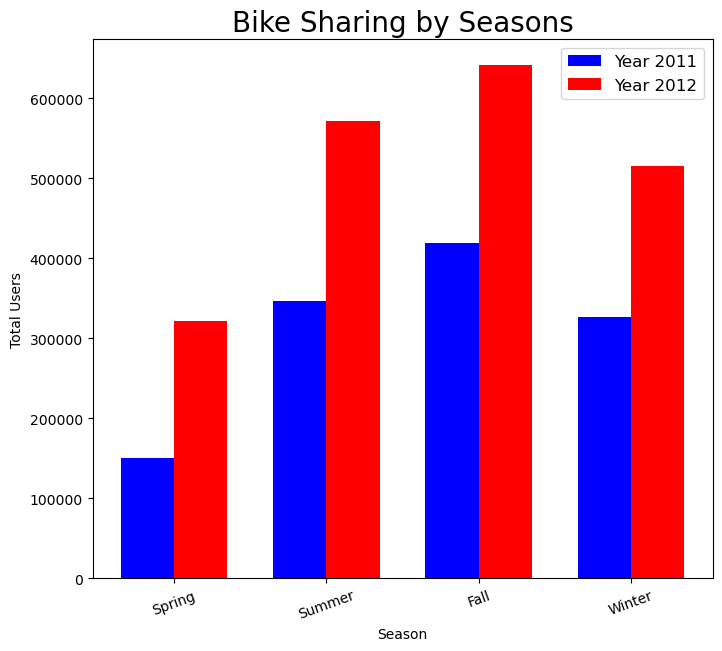

In [37]:
x = Y2011SeasonPivot_df["season"]
width = 0.35

fig, ax = plt.subplots(figsize=(8, 7))

Y2011 = ax.bar(x - width/2, Y2011SeasonPivot_df["cnt"], width, label='Year 2011', color='blue')
Y2012 = ax.bar(x + width/2, Y2012SeasonPivot_df["cnt"], width, label='Year 2012', color='red')

ax.set_title("Bike Sharing by Seasons", loc="center", fontsize=20)
ax.set_ylabel("Total Users")
ax.set_xlabel("Season")
ax.set_xticks(np.arange(1, 5, step=1))
ax.legend(fontsize=12)
ax.set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'],
       rotation=20)

plt.show()


## Conclusion

- Almost all user of Bike Sharing Facility is already registered, which might give us the idea on how to advertise the bike sharing facility to other people 
- It can be seen that the use of Bike Sharing facility is increased in 2012 if being compared to year 2011, this should give us the idea on how to move forward on facility improvement and maintenance to keep the users satisfied. 